In [36]:
import pandas as pd
from glob import glob
def getDataFromDay(day):
    dataframes = []
    for f in glob(day+"/*.json"):
        dataframes.append(pd.read_json(f,lines=True))
    dataDay = pd.concat(dataframes)
    return(dataDay)
def extractUserData(data):
    captured_keys = ['friends_count','favourites_count', 'description','screen_name', 'geo_enabled', 'lang', 'verified','time_zone','statuses_count', 'followers_count', 'following', 'name', 'location']
    users = set()
    userData = {}
    for key in captured_keys:
        userData[key] = []
    for ind,val in data.iterrows():
        if val['user']['name'] not in users:
            users.add(val['user']['name'])
            for key in captured_keys:
                userData[key].append(val['user'][key])
    userFrame = pd.DataFrame()
    for key in userData.keys():
        print(key,len(userData[key]))
        userFrame[key] = userData[key]
    return userFrame

In [37]:
data_23 = getDataFromDay("2017-09-23")
data_23_user = extractUserData(data_23)

friends_count 37708
favourites_count 37708
description 37708
screen_name 37708
geo_enabled 37708
lang 37708
verified 37708
time_zone 37708
statuses_count 37708
followers_count 37708
following 37708
name 37708
location 37708


In [38]:
data_23_user

,friends_count,favourites_count,description,screen_name,geo_enabled,lang,verified,time_zone,statuses_count,followers_count,following,name,location
0,2277,3059,citizen of the world and staunch remainer.,verokins,True,en,False,None,7599,1075,None,Veronica ♥️🇪🇺🇬🇧,Norwich UK 🇪🇺
1,2260,496,"I am a f/t carer, part time volunteer @AVRBITT...",TimWorth1,True,en,False,London,68025,1808,None,τ!m ω0ɍ†ɧ,Bristol
2,130,666,Pandora's box,McEwanMorton,False,en,False,None,12074,76,None,McE.Morton,None
3,2708,4628,"Chercheur expatrié, actualité politique et spo...",Vert_Galant,True,en,False,London,44922,993,None,HenriIV,None
4,58,4653,None,Hughcampx,False,en,False,None,4814,37,None,Hugh C,None
5,235,0,Global Stock Brokers for the global on-line an...,globalbrokers,False,en,False,None,44458,864,None,Global Stock Broker,Mauritius and Gibraltar
6,185,952,En crisi permanent. No miro la TV. Lifelong Jo...,BCNRoger,True,es,False,Berlin,1097,50,None,BCNRoger /\ZI/\,"Horta, Catalonia."
7,1662,6660,🏴󠁧󠁢󠁳󠁣󠁴󠁿 #BEtheSPIDER Visca Catalunya lliure! #...,tradasro,False,en,False,Pacific Time (US & Canada),21710,1956,None,Tradasro,Toronto / Blairgowrie SCOTLAND
8,4967,2953,I believe #humanrights are being crushed by un...,giDwF,False,en-GB,False,None,3383,3107,None,giantDWARF,"Sheffield, England"
9,1440,50661,Time to point and laugh at right wing snowflak...,LiberalIsland,True,en,False,None,86063,4097,None,liberalisland,NOT going away!


/Users/Finn/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


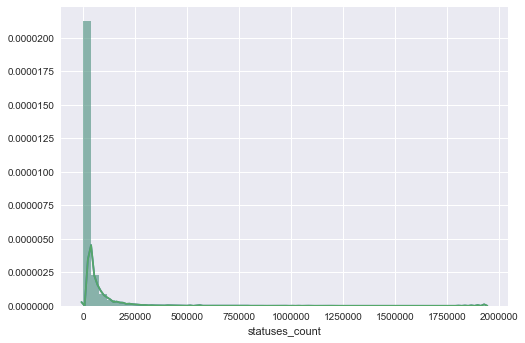

In [40]:
import seaborn as sns
sns.distplot(data_23_user['statuses_count'])
sns.plt.show()